%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
############################################
diff= 0.0 Upp= 0.0 Udif= 0.0 Vpp= 0.0 Upd= 0.0 Updf= 0.0 tpd= 2.0 tpddiff= 0.0
Delta= 0.0 , total weight =  0.8453699976254
Delta= 0.5 , total weight =  0.8578835467496
Delta= 1.0 , total weight =  0.8697587828354
Delta= 1.5 , total weight =  0.8809696027901999
Delta= 2.0 , total weight =  0.8914974530976001
Delta= 2.5 , total weight =  0.9013309556796
Delta= 3.0 , total weight =  0.9104669362472001
Delta= 3.5 , total weight =  0.9189086124379998
Delta= 4.0 , total weight =  0.92666567467
Delta= 4.5 , total weight =  0.9337524717739999
Delta= 5.0 , total weight =  0.9401865050620001
Delta= 5.5 , total weight =  0.945987862052
Delta= 6.0 , total weight =  0.9511779376920001
Delta= 6.5 , total weight =  0.9557783040339999
Delta= 6.6 , total weight =  0.9566295994
Delta= 6.7 , total weight =  0.957458356

############################################
diff= 0.0 Upp= 0.0 Udif= 0.0 Vpp= 0.0 Upd= 0.0 Updf= 0.0 tpd= 2.0 tpddiff= 0.16
Delta= 0.0 , total weight =  0.87298272822
Delta= 0.5 , total weight =  0.88449224866
Delta= 1.0 , total weight =  0.89526874225
Delta= 1.5 , total weight =  0.9053035757100001
Delta= 2.0 , total weight =  0.91459598413
Delta= 2.5 , total weight =  0.9231530964899999
Delta= 3.0 , total weight =  0.9309888014900001
Delta= 3.5 , total weight =  0.9381227340399998
Delta= 4.0 , total weight =  0.9445787862
Delta= 4.5 , total weight =  0.9503836120999999
Delta= 5.0 , total weight =  0.9555658132599999
Delta= 5.5 , total weight =  0.9601540048
Delta= 6.0 , total weight =  0.9641768982700001
Delta= 6.5 , total weight =  0.9676614894500002
Delta= 6.6 , total weight =  0.96829609157
Delta= 6.7 , total weight =  0.96891035815
Delta= 6.8 , total weight =  0.9695045807
Delta= 6.9 , total weight =  0.97007888363
Delta= 7.0 , total weight =  0.97063349814
Delta= 7.1 , total we

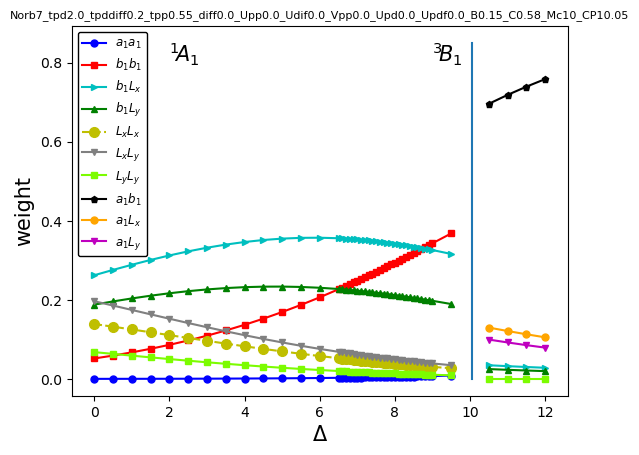

In [1]:
%pylab inline

import math
import numpy as np
from scipy.sparse.linalg import inv
#from numpy.linalg import inv
import scipy.sparse as sps
import scipy.sparse.linalg
import sys
import matplotlib.pyplot as plt
sys.path.append('../../src/')
from pylab import *

ed = 0
tpd = 2.0
tpddiffs = np.arange(0, 0.2001, 0.04)
tpp = 0.55

ep = 3.5
pds = 1.5
pdp = 0.7
#pds = 0.00001
#pdp = 0.00001
pps = 0.9
ppp = 0.2

A = 6.0
B = 0.15
C = 0.58

difs = np.arange(0.0, 0.051, 1)

Upps = np.arange(0, 0.01, 0.2)
Vpps = np.arange(0.0, 0.01, 0.1)
Udifs = np.arange(0.0 ,0.91,5)

Upds = np.arange(0,1.01,10)
Updfs = np.arange(0,0.11,10)
# Upps = [0.0]
# Vpps = [0.0]
Norb = 7
Mc = 10
eta = 0.2
for tpddiff in tpddiffs:
    tpddiff = round(tpddiff,3)
    for Upp in Upps:
        Upp = round(Upp,1)
        for Vpp in Vpps:
            Vpp = round(Vpp,1)
            for diff in difs:
                for Udif in Udifs:
                    Udif = round(Udif,1)
                    for Upd in Upds:
                        Upd = round(Upd,1)
                        for Updf in Updfs:
                            Updf = round(Updf,1) 
                            clf()
                            print('############################################\ndiff=',diff,\
                                  'Upp=',Upp,'Udif=',Udif,'Vpp=',Vpp,'Upd=',Upd,'Updf=',Updf,'tpd=',tpd,'tpddiff=',tpddiff) 
                            if Norb==7:
                                ff = 'GS_weights_Norb7'+'_tpd'+str(tpd)+'_tpddiff'+str(tpddiff)+'_tpp'+str(tpp)+'_diff'+str(diff)+'_Upp'+str(Upp)+'_Udif'+str(Udif) \
                                     +'_Vpp'+str(Vpp)+'_Upd'+str(Upd)+'_Updf'+str(Updf)+'_Mc'+str(Mc)+'_eta'+str(eta)+'.txt'
                            if Norb==9 or Norb==11:
                                ff = 'GS_weights_'+'Norb'+str(Norb)+'_pps'+str(pps)+'_ppp'+str(ppp)+'_diff'+str(diff)+\
                                     '_Upp'+str(Upp)+'_Udif'+str(Udif)+'_Vpp'+str(Vpp)+'_Upd'+str(Upd)+\
                                     '_Updf'+str(Updf)+'_Mc'+str(Mc)+'_eta'+str(eta)+'.txt'

                            a = loadtxt('./data_GS/'+ff,skiprows=0)
                            if Norb==9 or Norb==11:
                                a = np.delete(a, 3, axis=1)
                            for i in range(0,len(a)):
                                if abs(a[i,7]-a[i-1,7])>0.3:
                                    cp = round((a[i-1,1]+a[i-1,2])*0.5+0.05,2)
                                    idx = i-1
                            aa = [cp, cp]
                            bb = [0, 0.85]        

                            #plot 1A1 symmetry       
                            #d8_orb
                            plot((a[0:idx,1]+a[0:idx,2])*0.5, a[0:idx,4], '-bo',markersize='5',label="$a_{1}a_{1}$")
                            plot((a[0:idx,1]+a[0:idx,2])*0.5, a[0:idx,5], '-rs',markersize='5',label="$b_{1}b_{1}$")

                            #d9_orb
                            plot((a[0:idx,1]+a[0:idx,2])*0.5, a[0:idx,11], '-c>',markersize='5',label="$b_{1}L_x$")
                            plot((a[0:idx,1]+a[0:idx,2])*0.5, a[0:idx,17], '-g^',markersize='5',label="$b_{1}L_y$")

                            #d10_orb
                            plot((a[0:idx,1]+a[0:idx,2])*0.5, (a[0:idx,21]), '--yo',markersize='7',label="$L_xL_x$")
                            plot((a[0:idx,1]+a[0:idx,2])*0.5, (a[0:idx,22]), 'grey',markersize='5',marker='v',label="$L_xL_y$")
                            plot((a[0:idx,1]+a[0:idx,2])*0.5, (a[0:idx,23]), 'lawngreen',markersize='5',marker='s',label="$L_yL_y$")

                            #plot 3B1 symmetry       
                            #d8_orb 
                            plot((a[idx+1:,1]+a[idx+1:,2])*0.5, a[idx+1:,7], '-kp',markersize='5',label="$a_{1}b_{1}$")

                            #d9_orb
                            plot((a[idx+1:,1]+a[idx+1:,2])*0.5, a[idx+1:,9], 'orange',markersize='5',marker='o',label="$a_{1}L_x$")
                            plot((a[idx+1:,1]+a[idx+1:,2])*0.5, a[idx+1:,15], '-mv',markersize='5',label="$a_{1}L_y$")
                            plot((a[idx+1:,1]+a[idx+1:,2])*0.5, a[idx+1:,11], '-c>',markersize='5')
                            plot((a[idx+1:,1]+a[idx+1:,2])*0.5, a[idx+1:,17], '-g^',markersize='5')

                            #d10_orb
                            plot((a[idx+1:,1]+a[idx+1:,2])*0.5, (a[idx+1:,23]), 'lawngreen',markersize='5',marker='s')
                            for i in range(0,len(a)):
                                print ('Delta=', round((a[i,1]+a[i,2])*0.5,2),', total weight = ', sum(a[i,4:23]))



                            plot(aa, bb, '-')


                            if Norb==7:
                                title('Norb7'+'_tpd'+str(tpd)+'_tpddiff'+str(tpddiff)+'_tpp'+str(tpp)+'_diff'+str(diff)+'_Upp'+str(Upp)+'_Udif'+str(Udif)+\
                                      '_Vpp'+str(Vpp)+'_Upd'+str(Upd)+'_Updf'+str(Updf)+\
                                      '_B'+str(B)+'_C'+str(C)+'_Mc'+str(Mc)+'_CP'+str(cp), fontsize=8)
                            elif Norb==9 or Norb==11:
                                title('Norb'+str(Norb)+'_pds1.5_pdp0.7_ep3.5_pps'+str(pps)+'_ppp'+str(ppp)\
                                      +'_diff'+str(diff)+'_Upp'+str(Upp)\
                                      +'_Udif'+str(Udif)+'_Vpp'+str(Vpp)+'_Upd'+str(Upd)+'_Updf'+str(Updf)+'_B'+str(B)+'_C'+str(C)\
                                      +'_Mc'+str(Mc)+'_CP'+str(cp), fontsize=8)
                            xlabel('$\Delta$',fontsize=15)
                            ylabel('weight',fontsize=15)
                            text(9, 0.8, '$^3\!B_1$',fontsize=15)
                            text(2, 0.8, '$^1\!A_1$',fontsize=15)
                            #xlim([0,3])
                            #ylim([-6,10])
                            #grid('on',linestyle="--", linewidth=0.5, color='black', alpha=0.5)
                            legend(loc='best', fontsize=8.5, framealpha=1.0, edgecolor='black')
                            if Norb==7:
                                savefig("GS_components_Norb7_tpd"+str(tpd)+'_tpddiff'+str(tpddiff)+'_A'+str(A)+'_diff'+str(diff)+'_Upp'+str(Upp)\
                                        +'_Udif'+str(Udif)+'_Vpp'+str(Vpp)+'_Upd'+str(Upd)+'_Updf'+str(Updf)+".pdf")
                            elif Norb==9 or Norb==11:
                                savefig("GS_components_Norb"+str(Norb)+'_diff'+str(diff)+"_pps"+str(pps)+'_ppp'+str(ppp)+\
                                        '_ep'+str(ep)+'_diff'+str(diff)+'_Upp'+str(Upp)+'_Udif'+str(Udif)\
                                        +'_Vpp'+str(Vpp)+'_Upd'+str(Upd)+'_Updf'+str(Updf)+".pdf")